In [2]:
import numpy as np 
import pandas as pd 
import offset_analysis as a

In [2]:
n_samples = 18
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/250124_50_500k@200k/"

offsets_y = np.loadtxt(input_dir + "offsets_y.csv", delimiter = ",")
offsets_z = np.loadtxt(input_dir + "offsets_z.csv", delimiter = ",")

In [31]:
pred_offsets_y, pred_offsets_z, df, df_offsets = a.Analyse_Run(input_dir, 0, offsets_y=offsets_y[0], offsets_z=offsets_z[0])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [22]:
pred_offsets_y, pred_offsets_z, df_offsets = a.Analyse_Multiple_Runs(input_dir, n_samples, offsets_y, offsets_z)


ANALYSING DATAFRAME: 0

OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 1

Y AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan

Z AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 2

Y AXIS
PREDICTED OFFSET: 0.019767441342708025
TRUE OFFSET: 0.023635215978453705
RESIDUAL: -0.0038677746357456792
PERCENTAGE DIFFERENCE: -16.364456492682837

Z AXIS
PREDICTED OFFSET: -0.0005216174757265435
TRUE OFFSET: 0.007059503574802456
RESIDUAL: -0.006537886099075912
PERCENTAGE DIFFERENCE: -107.38886906422651


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 3

Y AXIS
PREDICTED OFFSET: 0.04790633760410401
TRUE OFFSET: 0.05188323539872159
RESIDUAL: -0.00397689779461758
PERCENTAGE DIFFERENCE: -7.665092132468615

Z AXIS
PREDICTED OFFSET: -0.0027718776124174838
TRUE OFFSET: 0.002507953532048939
RESIDUAL: 0.00026392408036854473
PERCENTAGE DIFFERENCE: -210.523483668891


OFFSET RECONSTRU

In [11]:
pred_y_tot, pred_z_tot = a.Summarise_DataFrame(df_offsets, offsets_y[0], offsets_z[0])

OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 1

Y AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan

Z AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 2

Y AXIS
PREDICTED OFFSET: -0.0010651943953803311
TRUE OFFSET: 0.0
RESIDUAL: 0.0010651943953803311
PERCENTAGE DIFFERENCE: nan

Z AXIS
PREDICTED OFFSET: 0.0027253092174532867
TRUE OFFSET: 0.0
RESIDUAL: 0.0027253092174532867
PERCENTAGE DIFFERENCE: nan


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 3

Y AXIS
PREDICTED OFFSET: -0.002574410942202121
TRUE OFFSET: 0.0
RESIDUAL: 0.002574410942202121
PERCENTAGE DIFFERENCE: nan

Z AXIS
PREDICTED OFFSET: 0.0005936796361822871
TRUE OFFSET: 0.0
RESIDUAL: 0.0005936796361822871
PERCENTAGE DIFFERENCE: nan


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 4

Y AXIS
PREDICTED OFFSET: -0.008653123344515734
TRUE OFFSET: 0.0
RESIDUAL: 0.008653123344515734
PERCENTAGE DIFFERENCE:

In [99]:
new_offsets_y = offsets_y - pred_offsets_y
new_offsets_z = offsets_z - pred_offsets_z

np.savetxt(input_dir + "new_offsets_y.csv", new_offsets_y, delimiter = ",")
np.savetxt(input_dir + "new_offsets_z.csv", new_offsets_z, delimiter = ",")

In [5]:
print("Y SUM OF FAKES: " + str(np.sum(pred_offsets_y.flatten()[offsets_y.flatten() == 0])))
print("Z SUM OF FAKES: " + str(np.sum(pred_offsets_z.flatten()[offsets_z.flatten() == 0])))

Y SUM OF FAKES: 0.0
Z SUM OF FAKES: 0.0


In [23]:
start_layer = 1
end_layer = 6

offsets_y_flat = offsets_y[:, start_layer: end_layer].flatten()
offsets_z_flat = offsets_z[:, start_layer: end_layer].flatten()
pred_offsets_y_flat = pred_offsets_y[:, start_layer: end_layer].flatten()
pred_offsets_z_flat = pred_offsets_z[:, start_layer: end_layer].flatten()
truth = np.append(offsets_y_flat, offsets_z_flat)
pred = np.append(pred_offsets_y_flat, pred_offsets_z_flat)
#truth = np.append(offsets_y_flat[offsets_y_flat != 0], offsets_z_flat[offsets_z_flat != 0])
#pred = np.append(pred_offsets_y_flat[offsets_y_flat != 0], pred_offsets_z_flat[offsets_z_flat != 0])+0.006
#truth = offsets_y_flat
#pred = pred_offsets_y_flat

res = pred-truth
rel_err = (((pred - truth)/truth)*100)

print("Mean Relative Error: " + str(np.mean(rel_err)))
print("Median Relative Error: " + str(np.median(rel_err)))
print("Standard Deviation Relative Error: " + str(np.std(rel_err)))
print("\n")
print("Mean Absolute Residual (um): " + str(np.mean(np.abs(res))*1000))
print("Median Absolute Residual (um): " + str(np.median(np.abs(res))*1000))
print("Standard Deviation Residual (um): " + str(np.std(res)*1000))

Mean Relative Error: -28.707958429150235
Median Relative Error: -5.2855020600838785
Standard Deviation Relative Error: 2036.2131704560975


Mean Absolute Residual (um): 15.663630247939798
Median Absolute Residual (um): 5.911436664227915
Standard Deviation Residual (um): 27.87258164288627


In [39]:
print(np.sum(np.abs(res)))
print(np.sum(np.abs(truth)))

6.823118854787795
24.5475140701094


-0.009900659011975677
0.16097302797100238
0.0


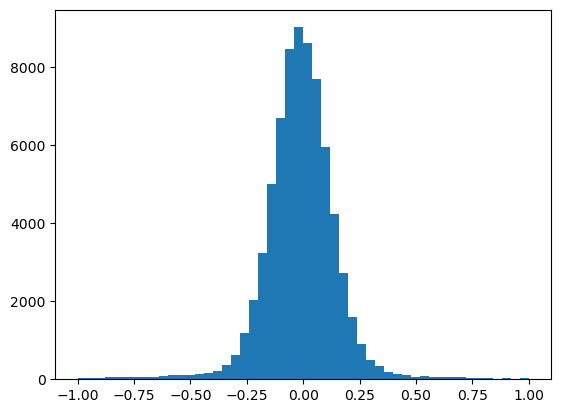

In [20]:
from matplotlib import pyplot as plt
plt.hist(df_offsets["PRED_OFFSET_Y_6"][np.abs(df_offsets["PRED_OFFSET_Y_6"]) < 1], bins = 50)
print(np.median(df_offsets["PRED_OFFSET_Y_6"][np.abs(df_offsets["PRED_OFFSET_Y_6"]) < 1]))
print(np.std(df_offsets["PRED_OFFSET_Y_6"][np.abs(df_offsets["PRED_OFFSET_Y_6"]) < 1]))

from scipy.stats import shapiro
stat, p = shapiro(df_offsets["PRED_OFFSET_Y_6"][np.abs(df_offsets["PRED_OFFSET_Y_6"]) < 1])
print(p)

0.009680003995935752
0.1395412783550161
0.731813371181488


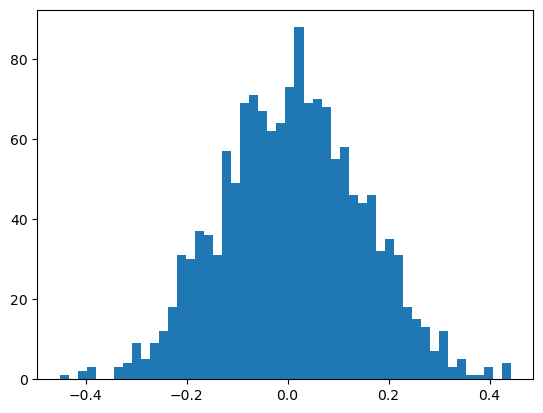

In [53]:
plt.hist(np.tan(df["PHI_TRUTH"])*500+df["GLOBAL_Y_HIT_1"]-df["GLOBAL_Y_HIT_2"], bins = 50)
print(np.mean(np.tan(df["PHI_TRUTH"])*500+df["GLOBAL_Y_HIT_1"]-df["GLOBAL_Y_HIT_2"]))
print(np.std(np.tan(df["PHI_TRUTH"])*500+df["GLOBAL_Y_HIT_1"]-df["GLOBAL_Y_HIT_2"]))

from scipy.stats import shapiro
stat, p = shapiro(np.tan(df["PHI_TRUTH"])*500+df["GLOBAL_Y_HIT_1"]-df["GLOBAL_Y_HIT_2"])
print(p)

-0.00026388635281230396
0.004728306601354995
0.0


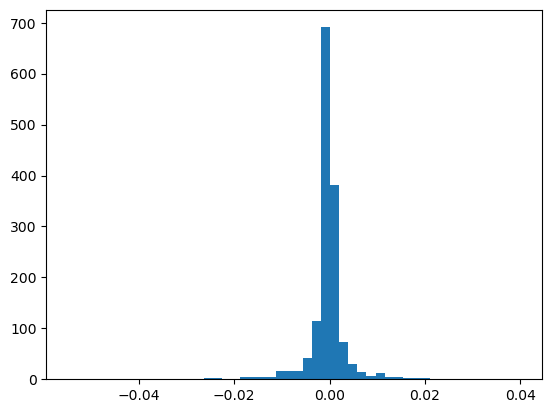

In [54]:
from matplotlib import pyplot as plt
plt.hist((np.tan(df["PHI_FIT"])*500-np.tan(df["PHI_TRUTH"])*500), bins = 50)
print(np.mean((np.tan(df["PHI_FIT"])*500-np.tan(df["PHI_TRUTH"])*500)))
print(np.std((np.tan(df["PHI_FIT"])*500-np.tan(df["PHI_TRUTH"])*500)))

from scipy.stats import shapiro
stat, p = shapiro((np.tan(df["PHI_FIT"])*500-np.tan(df["PHI_TRUTH"])*500))
print(p)

In [26]:
from matplotlib import pyplot as plt
plt.hist((df["FIT_PY_1"]/df["FIT_PX_1"]-np.tan(df["PHI_TRUTH"]))*500,bins=50)
print(np.mean((df["FIT_PY_1"]/df["FIT_PX_1"]-np.tan(df["PHI_TRUTH"]))*500))
print(np.std((df["FIT_PY_1"]/df["FIT_PX_1"]-np.tan(df["PHI_TRUTH"]))*500))

from scipy.stats import shapiro
stat, p = shapiro((df["FIT_PY_1"]/df["FIT_PX_1"]-np.tan(df["PHI_TRUTH"]))*500)
print(p)

NameError: name 'df' is not defined

In [25]:
len(df_offsets)

72335

In [57]:
offsets_y

array([[ 0.00000000e+00,  4.64264612e-02, -6.08220479e-02,
        -9.86324222e-02,  1.14515733e-02,  9.59801154e-02],
       [ 0.00000000e+00,  3.87513151e-02,  1.52950801e-02,
        -3.99827098e-02,  1.45222736e-04, -4.44639544e-02],
       [ 0.00000000e+00,  1.42890781e-02,  1.14208215e-02,
         2.42424003e-02,  8.30008372e-02, -3.15334056e-02],
       [ 0.00000000e+00, -6.90129755e-02, -8.91755468e-03,
         1.02428233e-01, -1.27189720e-01,  3.00519620e-02],
       [ 0.00000000e+00,  4.40980127e-02,  3.97360801e-02,
         1.18209059e-01, -1.68508874e-02, -1.92743887e-02],
       [ 0.00000000e+00, -8.74612272e-02,  1.14908161e-02,
        -8.02626200e-02, -1.91872938e-02,  4.49074106e-02],
       [ 0.00000000e+00,  5.67798609e-02,  3.68708017e-02,
         4.77443131e-03, -3.92339434e-02,  8.64348259e-02],
       [ 0.00000000e+00,  3.53795189e-02,  2.47204534e-02,
         1.72118818e-02, -5.47917535e-02,  8.95782330e-03],
       [ 0.00000000e+00, -7.18694971e-03, -4.414

In [20]:
pred_offsets_z*1000

array([[ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.59042009,  3.85902163,
        -2.03605583],
       [ 0.        , -7.61724678, -5.32812873, -5.

Last 3 layers y offset only.

Mean Relative Error: -228.12817298653613
Median Relative Error: 6.514021992482683
Standard Deviation Relative Error: 9116.3481608253


Mean Residual (um): 52.89137702102081
Median Residual (um): 45.826329440932454
Standard Deviation Residual (um): 52.43522562683375

Using fitted momentum from first layer.

Mean Relative Error: -59.77793070089386
Median Relative Error: -1.410982882108188
Standard Deviation Relative Error: 4996.840718268901


Mean Residual (um): 18.45217104004862
Median Residual (um): 3.811158691559337
Standard Deviation Residual (um): 33.80612266879845


Using average initial momentum values across first 3 layers.

Mean Relative Error: -36.660462661184866
Median Relative Error: -2.917935204628254
Standard Deviation Relative Error: 5045.304449409829

Mean Residual (um): 20.05592484390729
Median Residual (um): 5.074819495055057
Standard Deviation Residual (um): 34.50053175139538

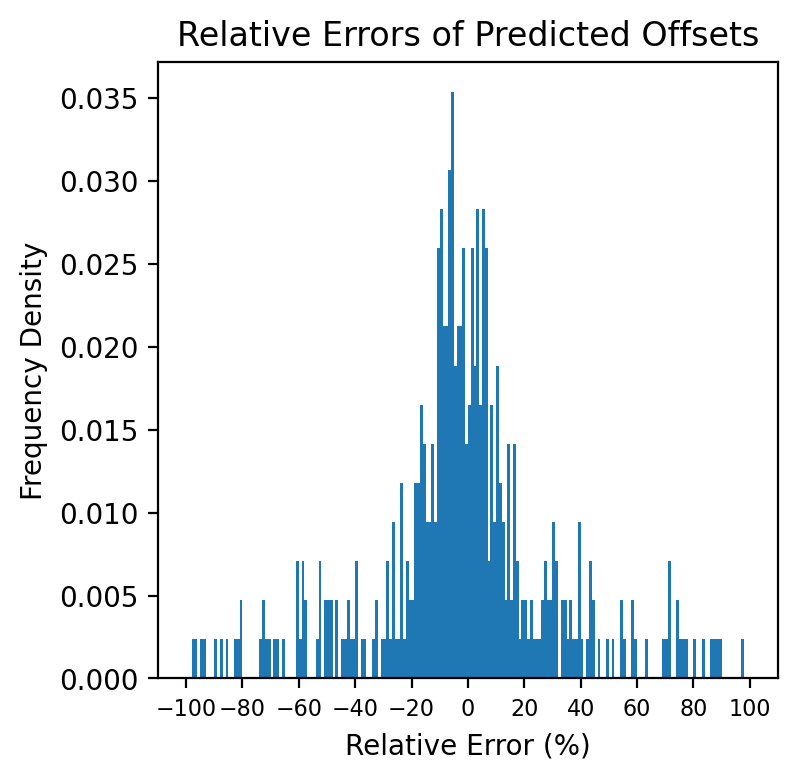

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize = (4,4), dpi = 200)
plt.hist(rel_err, bins = np.arange(-100, 101, 1), density = True)
plt.xlabel("Relative Error (%)")
plt.ylabel("Frequency Density")
plt.title("Relative Errors of Predicted Offsets")
plt.xticks(np.arange(-100,120,20), size = 8)
plt.show()

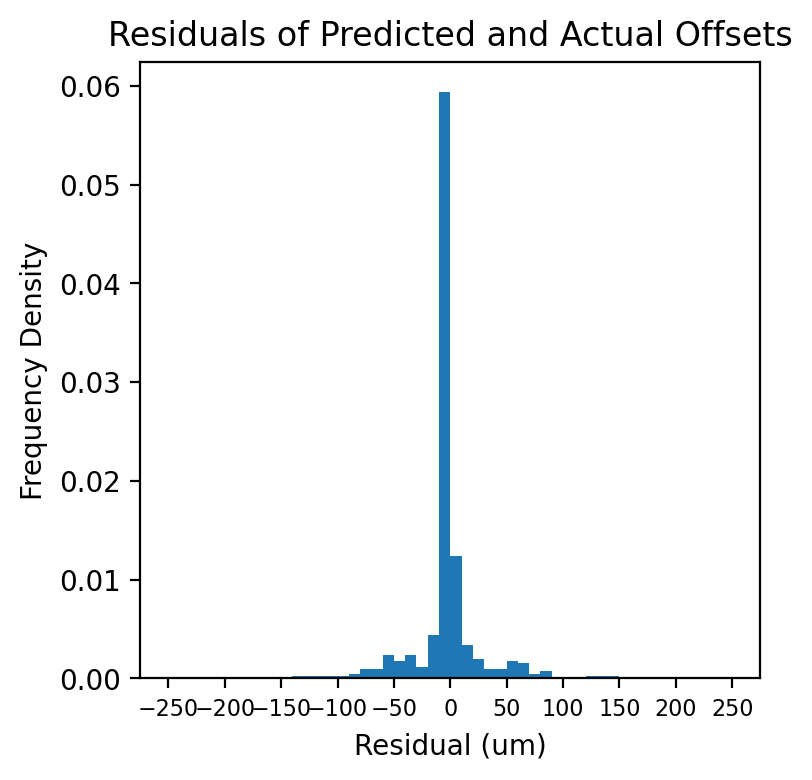

In [24]:
from matplotlib import pyplot as plt

plt.figure(figsize = (4,4), dpi = 200)
plt.hist(res*1000, bins = np.arange(-250, 260, 10), density = True)#np.arange(-100, 100.4, 0.4), density = True)
plt.xlabel("Residual (um)")
plt.ylabel("Frequency Density")
plt.title("Residuals of Predicted and Actual Offsets")
plt.xticks(np.arange(-250, 300,50), size = 8)
#plt.xticks(np.arange(-100,120,20), size = 8)
plt.show()

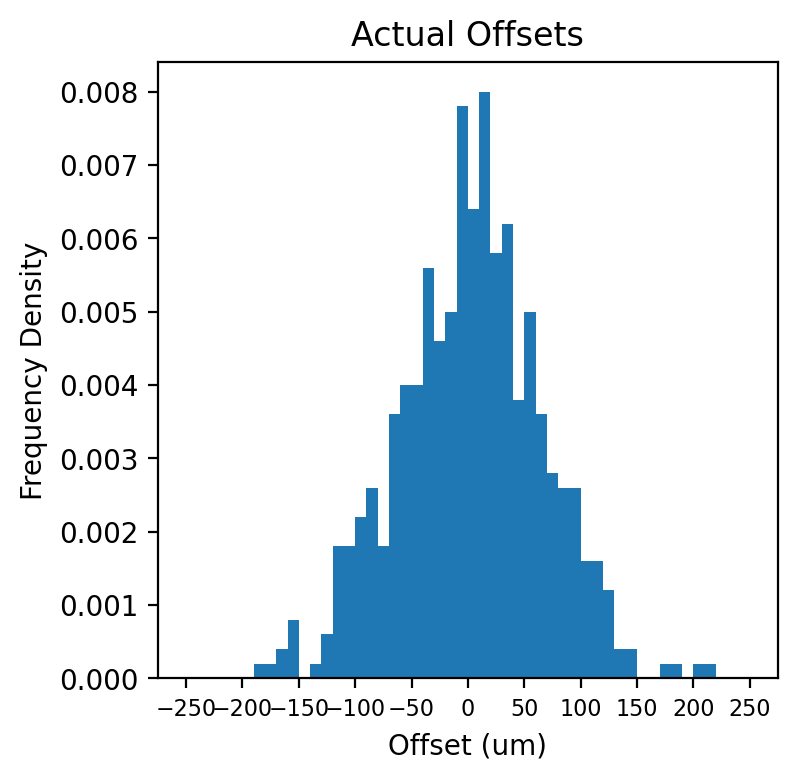

In [26]:
from matplotlib import pyplot as plt

plt.figure(figsize = (4,4), dpi = 200)
plt.hist(truth*1000, bins = np.arange(-250, 260, 10), density = True)
plt.xlabel("Offset (um)")
plt.ylabel("Frequency Density")
plt.title("Actual Offsets")
plt.xticks(np.arange(-250, 300,50), size = 8)
plt.show()

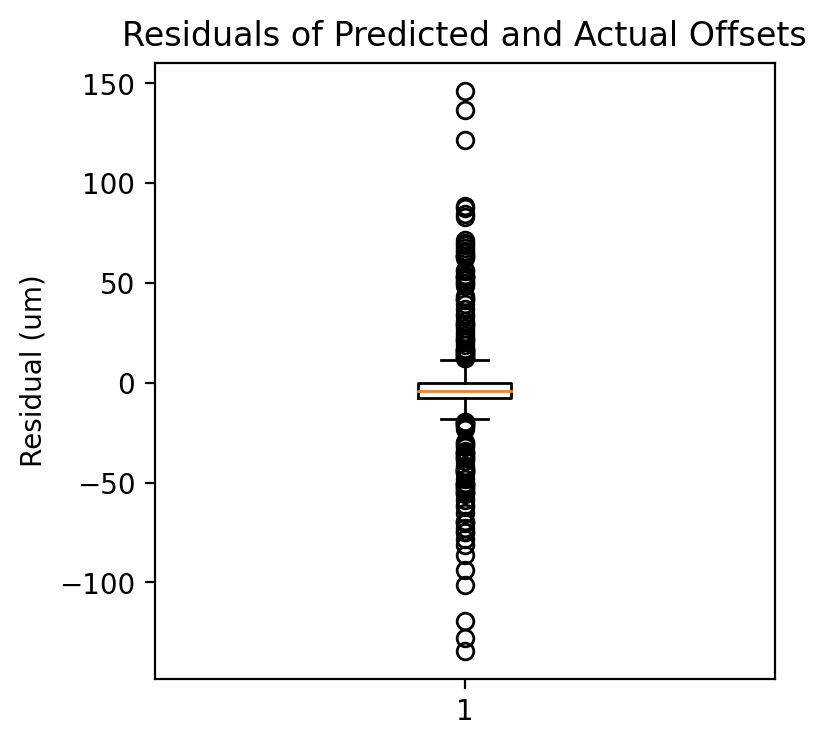

In [25]:
plt.figure(figsize = (4,4), dpi = 200)
plt.boxplot(res*1000)
plt.ylabel("Residual (um)")
plt.title("Residuals of Predicted and Actual Offsets")
plt.show()

## Testing Full Transformation Analysis

In [811]:
import simulation as sim

index = 1
plane = 2
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/300124_5_500k@200k (1)/"

offsets_y = np.loadtxt(input_dir + "offsets_y.csv", delimiter = ",")
offsets_z = np.loadtxt(input_dir + "offsets_z.csv", delimiter = ",")
offsets_x = np.loadtxt(input_dir + "offsets_x.csv", delimiter = ",")

rotations_z = np.loadtxt(input_dir + "rotations_z.csv", delimiter = ",")
rotations_y = np.loadtxt(input_dir + "rotations_y.csv", delimiter = ",")
rotations_x = np.loadtxt(input_dir + "rotations_x.csv", delimiter = ",")

df = sim.Generate_DataFrame_From_ROOT(input_dir, index)
#df = df[df["CHI2SUM"] < 5000]
df_offsets = sim.Generate_Predicted_Offset_DataFrame(df)

df

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,PZ_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.005709,0.000964,1.573792,175.159170,-0.524695,315.472931,-1.0,315.471802,0.441197,-0.715620,...,-367.490631,-348.245117,-451.008636,-345.991302,-374.318665,-374.457642,-374.574005,-375.225922,-374.780975,-373.783630
1,-0.002176,0.000540,1.572127,459.503798,-0.611387,2577.188477,-1.0,2577.186523,2.278276,-2.345369,...,-314.639252,-306.755219,-429.069122,-305.769135,-334.977081,-334.419922,-333.849304,-323.613251,-322.988708,-322.341400
2,-0.010011,0.002091,1.575277,99.890710,-0.447538,124.615028,-1.0,124.613907,0.308920,-0.428145,...,-317.281769,-288.252258,-410.247223,-284.732208,-320.466766,-320.784302,-321.110107,-326.490662,-326.084198,-324.585083
3,-0.021350,0.019447,1.572255,46.837672,-0.068305,46.814938,-1.0,46.805733,0.924514,-0.084862,...,-277.859314,-262.458527,-221.200211,-260.734131,-280.291107,-278.770966,-277.214569,-249.470383,-247.872482,-247.142853
4,-0.014365,0.001384,1.568247,69.612779,0.177493,67.657875,-1.0,67.657463,0.080552,0.220833,...,392.653473,364.809662,282.099182,361.507477,396.944977,393.984100,390.983734,338.732361,335.931030,334.405060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,-0.015868,-0.008092,1.561868,63.018166,0.562635,61.421173,-1.0,61.416958,-0.508043,0.509745,...,342.941986,272.388000,339.136230,264.250122,350.343872,347.342285,344.378143,295.237915,292.113007,287.869019
1393,-0.004313,-0.002674,1.571618,231.879081,-0.190492,336.935608,-1.0,336.934540,-0.819631,-0.224039,...,-155.692764,-149.903900,-172.779007,-149.251907,-157.357803,-157.291412,-157.221756,-155.852783,-155.668152,-155.365173
1394,-0.005928,-0.004419,1.570912,168.704092,-0.019535,288.865784,-1.0,288.863434,-1.154409,-0.165343,...,-425.575592,-420.740356,-355.149170,-420.081421,-423.305450,-422.213593,-421.137756,-403.756195,-403.037170,-402.664978
1395,-0.000445,-0.002463,1.569995,2248.532855,1.801171,1200.669678,-1.0,1200.665771,-3.037341,0.412186,...,123.012901,120.226707,236.258148,119.728371,139.987640,139.891174,139.794174,138.117813,137.920166,137.617157


In [812]:
tx = rotations_x[index][plane-1]
ty = rotations_y[index][plane-1]
tz = rotations_z[index][plane-1]

dx = offsets_x[index][plane-1]
dy = offsets_y[index][plane-1]
dz = offsets_z[index][plane-1]

cx = np.cos(tx)
sx = np.sin(tx)

cy = np.cos(ty)
sy = np.sin(ty)

cz = np.cos(tz)
sz = np.sin(tz)

print(tx, ty, tz, dx, dy ,dz)

0.1 0.0 0.0 0.0 10.0 0.0


In [820]:
#NEW METHOD WITH ROTATIONS GOING X THEN Y THEN Z
yp = (sx*sy*sz + cx*cz)*(df["LOCAL_Y_HIT_" + str(plane)]) + dy + (cx*sy*sz-sx*cz)*(df["LOCAL_Z_HIT_" + str(plane)]) - ((sx*sy*cz-sz*cx)*df["LOCAL_Y_HIT_" + str(plane)] + (cx*sy*cz+sz*sx)*df["LOCAL_Z_HIT_" + str(plane)] + dx)*df["PY_TRUTH"]/df["PX_TRUTH"]
zp = (sx*cy)*(df["LOCAL_Y_HIT_" + str(plane)]) + dz + (cx*cy)*(df["LOCAL_Z_HIT_" + str(plane)]) - ((sx*sy*cz-sz*cx)*df["LOCAL_Y_HIT_" + str(plane)] + (cx*sy*cz+sz*sx)*df["LOCAL_Z_HIT_" + str(plane)] + dx)*df["PZ_TRUTH"]/df["PX_TRUTH"]

In [814]:
y_pred_2 = df["Y_TRUTH_1"] + np.tan(df["PHI_TRUTH"])*500
z_pred_2 = df["Z_TRUTH_1"] + df["PZ_TRUTH"]/df["PX_TRUTH"]*500

0.0022339592106845885
0.09740665984646214


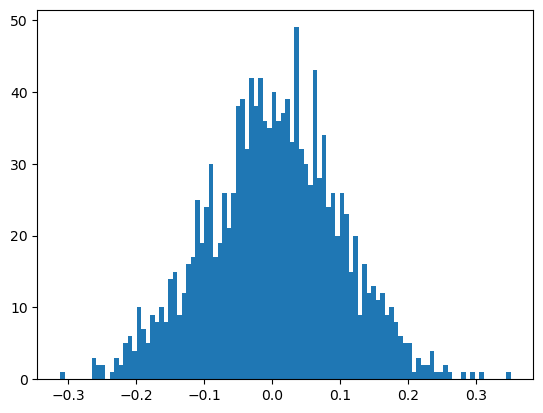

0.004978202568622692
0.08747718983812582


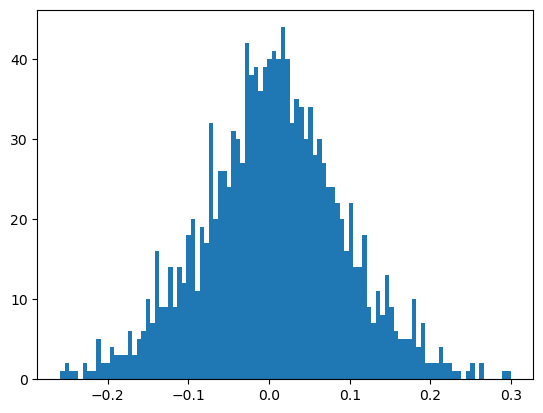

In [821]:
from matplotlib import pyplot as plt

plt.hist(yp - y_pred_2, bins = 100)
print(np.median(yp - y_pred_2))
print(np.std(yp - y_pred_2))
plt.show()

#print(np.median(zp - df["GLOBAL_Z_HIT_"+ str(plane)]))
plt.hist(zp - z_pred_2, bins = 100)
print(np.median(zp - z_pred_2))
print(np.std(zp - z_pred_2))
plt.show()


0.04452675721063315
0.16912351807610934


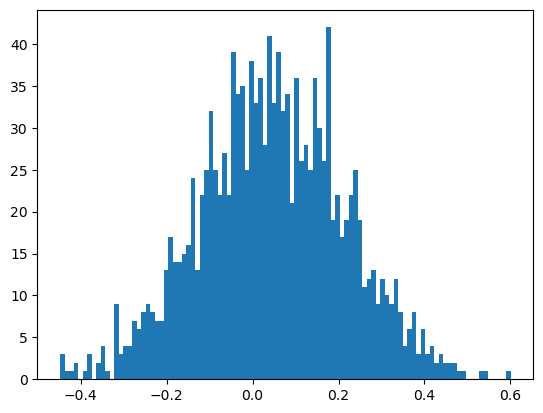

-0.02437295082332014
0.34208370731015064


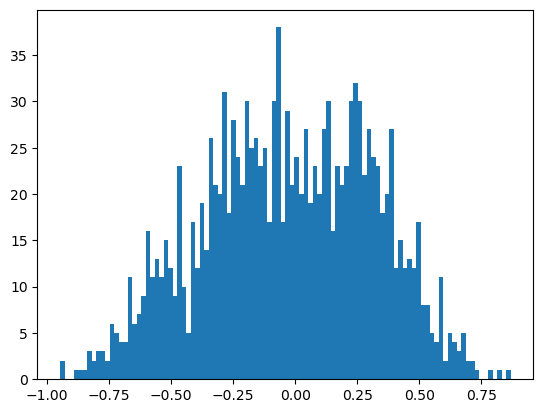

In [816]:
from matplotlib import pyplot as plt

plt.hist(yp - df_offsets["PRED_Y_"+ str(plane)], bins = 100)
print(np.median(yp - df_offsets["PRED_Y_"+ str(plane)]))
print(np.std(yp - df_offsets["PRED_Y_"+ str(plane)]))
plt.show()

#print(np.median(zp - df["GLOBAL_Z_HIT_"+ str(plane)]))
plt.hist(zp - df_offsets["PRED_Z_"+ str(plane)], bins = 100)
print(np.median(zp - df_offsets["PRED_Z_"+ str(plane)]))
print(np.std(zp - df_offsets["PRED_Z_"+ str(plane)]))
plt.show()


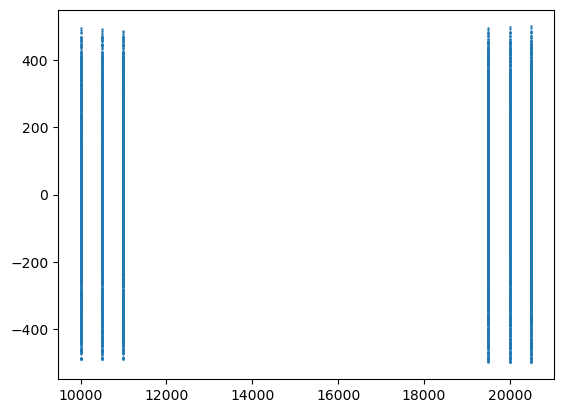

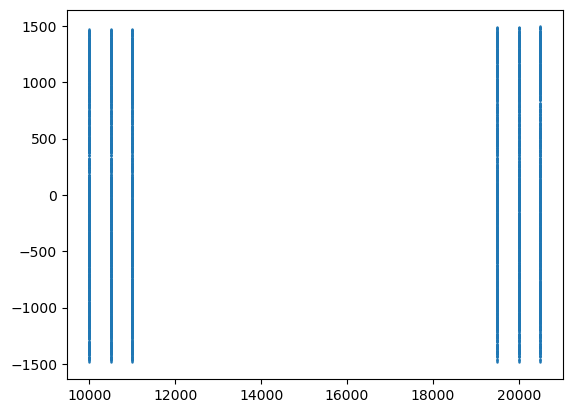

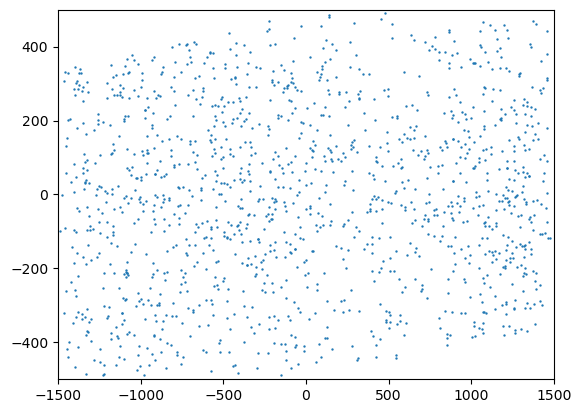

In [817]:
plt.scatter(x = [df["X_TRUTH_1"].values, df["X_TRUTH_2"].values, df["X_TRUTH_3"].values, df["X_TRUTH_4"].values, df["X_TRUTH_5"].values, df["X_TRUTH_6"].values], 
            y = [df["Z_TRUTH_1"].values, df["Z_TRUTH_2"].values, df["Z_TRUTH_3"].values, df["Z_TRUTH_4"].values, df["Z_TRUTH_5"].values, df["Z_TRUTH_6"].values],
            s = 0.5)
plt.show()
plt.scatter(x = [df["X_TRUTH_1"].values, df["X_TRUTH_2"].values, df["X_TRUTH_3"].values, df["X_TRUTH_4"].values, df["X_TRUTH_5"].values, df["X_TRUTH_6"].values], 
            y = [df["Y_TRUTH_1"].values, df["Y_TRUTH_2"].values, df["Y_TRUTH_3"].values, df["Y_TRUTH_4"].values, df["Y_TRUTH_5"].values, df["Y_TRUTH_6"].values],
            s = 0.5)
plt.show()
plt.scatter(x = df["Y_TRUTH_1"].values, 
            y = df["Z_TRUTH_1"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_2"].values, 
            y = df["Z_TRUTH_2"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_3"].values, 
            y = df["Z_TRUTH_3"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_4"].values, 
            y = df["Z_TRUTH_4"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_5"].values, 
            y = df["Z_TRUTH_5"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_6"].values, 
            y = df["Z_TRUTH_6"].values,
            s = 0.5)
plt.xlim(-1500, 1500)
plt.ylim(-500, 500)
plt.show()

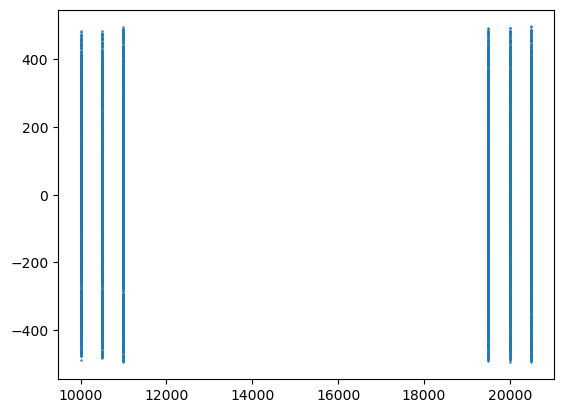

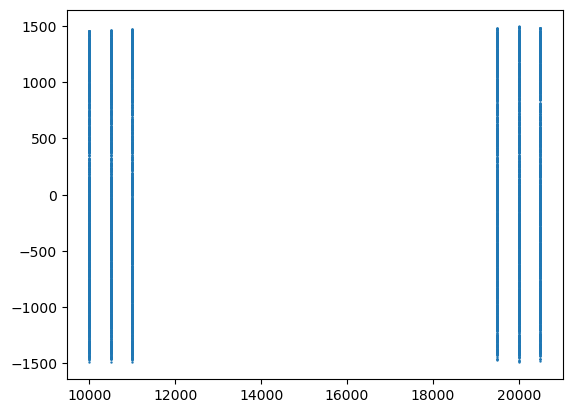

In [402]:
plt.scatter(x = [df["GLOBAL_X_HIT_1"].values, df["GLOBAL_X_HIT_2"].values, df["GLOBAL_X_HIT_3"].values, df["GLOBAL_X_HIT_4"].values, df["GLOBAL_X_HIT_5"].values, df["GLOBAL_X_HIT_6"].values], 
            y = [df["LOCAL_Z_HIT_1"].values, df["LOCAL_Z_HIT_2"].values, df["LOCAL_Z_HIT_3"].values, df["LOCAL_Z_HIT_4"].values, df["LOCAL_Z_HIT_5"].values, df["LOCAL_Z_HIT_6"].values],
            s = 0.5)
plt.show()
plt.scatter(x = [df["GLOBAL_X_HIT_1"].values, df["GLOBAL_X_HIT_2"].values, df["GLOBAL_X_HIT_3"].values, df["GLOBAL_X_HIT_4"].values, df["GLOBAL_X_HIT_5"].values, df["GLOBAL_X_HIT_6"].values], 
            y = [df["LOCAL_Y_HIT_1"].values, df["LOCAL_Y_HIT_2"].values, df["LOCAL_Y_HIT_3"].values, df["LOCAL_Y_HIT_4"].values, df["LOCAL_Y_HIT_5"].values, df["LOCAL_Y_HIT_6"].values],
            s = 0.5)
plt.show()

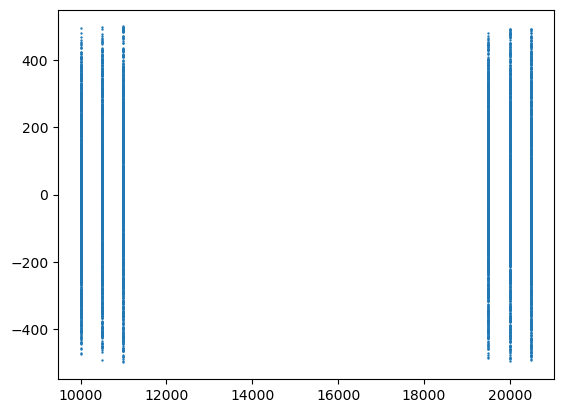

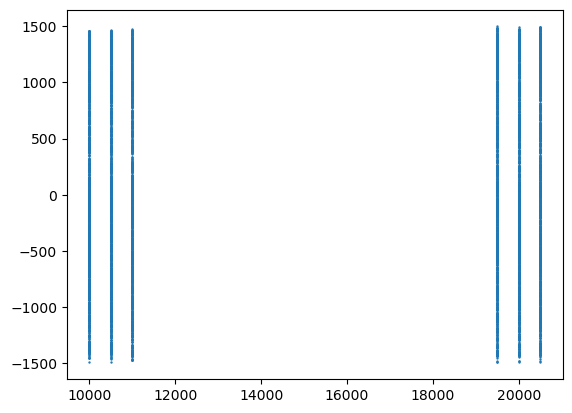

In [35]:
plt.scatter(x = [df["GLOBAL_X_HIT_1"].values, df["GLOBAL_X_HIT_2"].values, df["GLOBAL_X_HIT_3"].values, df["GLOBAL_X_HIT_4"].values, df["GLOBAL_X_HIT_5"].values, df["GLOBAL_X_HIT_6"].values], 
            y = [df["GLOBAL_Z_HIT_1"].values, df["GLOBAL_Z_HIT_2"].values, df["GLOBAL_Z_HIT_3"].values, df["GLOBAL_Z_HIT_4"].values, df["GLOBAL_Z_HIT_5"].values, df["GLOBAL_Z_HIT_6"].values],
            s = 0.5)
plt.show()
plt.scatter(x = [df["GLOBAL_X_HIT_1"].values, df["GLOBAL_X_HIT_2"].values, df["GLOBAL_X_HIT_3"].values, df["GLOBAL_X_HIT_4"].values, df["GLOBAL_X_HIT_5"].values, df["GLOBAL_X_HIT_6"].values], 
            y = [df["GLOBAL_Y_HIT_1"].values, df["GLOBAL_Y_HIT_2"].values, df["GLOBAL_Y_HIT_3"].values, df["GLOBAL_Y_HIT_4"].values, df["GLOBAL_Y_HIT_5"].values, df["GLOBAL_Y_HIT_6"].values],
            s = 0.5)
plt.show()

## Simulation with Truth Values

In [13]:
PX_PRIME, PY_PRIME, PZ_PRIME, DX, DY, DZ = a.Propagate_B_Field(df["PX_TRUTH"], df["PY_TRUTH"], df["PZ_TRUTH"], 1, 1, 4000)

delta_y = np.tan(df["PHI_TRUTH"])*500

delta_y_prime = PY_PRIME/PX_PRIME * (500)

PRED_Y = 3 * delta_y + df["Y_TRUTH_1"] + DY + 4000 * PY_PRIME/PX_PRIME + (3-3) * delta_y_prime 

df["Y_TRUTH_4"] - PRED_Y

0       0.000317
1       0.008267
2       0.020795
3      -0.031178
4       0.030925
          ...   
1463   -0.005817
1464    0.009209
1465   -0.009705
1466    0.027543
1467    0.023857
Length: 1468, dtype: float64

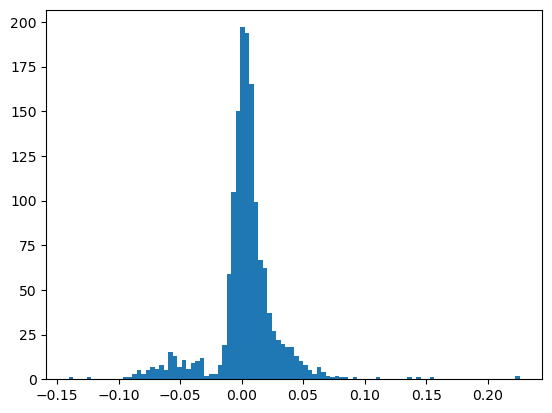

3.1691953039045346
26.584366274662152


In [16]:
plt.hist(df["Y_TRUTH_4"] - PRED_Y, bins = 100)
plt.show()
print(np.mean(df["Y_TRUTH_4"] - PRED_Y)*1000)
print(np.std(df["Y_TRUTH_4"] - PRED_Y)*1000)

## Repropagation

In [71]:
import uproot
import awkward as ak

def Shift_NaNs(input_array):
    
    nan_mask = np.isnan(input_array)
    output_array = np.array([np.concatenate((row[nan_mask_row], row[~nan_mask_row])) for row, nan_mask_row in zip(input_array, nan_mask)])

    return output_array

def Process_Coords(input_ak_array):
    return Shift_NaNs(ak.to_numpy(ak.pad_none(input_ak_array, target = 6, clip=True)).filled(np.nan))
    
def Generate_DataFrame_From_ROOT(input_dir, i):

    output_path = input_dir + "df" + str(i) + ".csv"
    trackstates_path = input_dir + str(i) + "/trackstates_fitter.root"
    tracksummary_path = input_dir + str(i) + "/tracksummary_fitter.root"

    file = uproot.open(trackstates_path)
    tree_input = file["trackstates"]

    X_TRUTH = Process_Coords(tree_input["t_x"].array())
    GLOBAL_X_HIT = Process_Coords(tree_input["g_x_hit"].array())
    FIT_X_HIT = Process_Coords(tree_input["g_x_smt"].array())

    Y_TRUTH = Process_Coords(tree_input["t_y"].array())
    GLOBAL_Y_HIT = Process_Coords(tree_input["g_y_hit"].array())
    FIT_Y_HIT = Process_Coords(tree_input["g_y_smt"].array())
    LOCAL_Y_HIT = Process_Coords(tree_input["l_y_hit"].array())

    Z_TRUTH = Process_Coords(tree_input["t_z"].array())
    GLOBAL_Z_HIT = Process_Coords(tree_input["g_z_hit"].array())
    FIT_Z_HIT = Process_Coords(tree_input["g_z_smt"].array())
    LOCAL_Z_HIT = Process_Coords(-tree_input["l_x_hit"].array())

    FIT_PX = Process_Coords(tree_input["px_smt"].array())
    FIT_PY = Process_Coords(tree_input["py_smt"].array())
    FIT_PZ = Process_Coords(tree_input["pz_smt"].array())

    file.close()

    file = uproot.open(tracksummary_path)
    tree_input = file["tracksummary"]

    QOP_FIT = ak.to_numpy(ak.flatten(tree_input["eQOP_fit"].array()))
    PHI_FIT = ak.to_numpy(ak.flatten(tree_input["ePHI_fit"].array()))
    THETA_FIT = ak.to_numpy(ak.flatten(tree_input["eTHETA_fit"].array()))

    P_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_p"].array()))
    Q_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_charge"].array()))
    PX_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_px"].array()))
    PY_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_py"].array()))
    PZ_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_pz"].array()))
    PHI_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_phi"].array()))
    THETA_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_theta"].array()))

    CHI2SUM = ak.to_numpy(ak.flatten(tree_input["chi2Sum"].array()))
    NDF = ak.to_numpy(ak.flatten(tree_input["NDF"].array()))

    file.close()

    P_FIT = Q_TRUTH/QOP_FIT
    PZ_FIT = P_FIT*np.cos(THETA_FIT)

    df_columns = [
                "QOP_FIT", "PHI_FIT", "THETA_FIT", "P_FIT", "PZ_FIT", 
                "P_TRUTH", "Q_TRUTH", "PX_TRUTH", "PY_TRUTH", "PZ_TRUTH", "PHI_TRUTH", "THETA_TRUTH", 
                "CHI2SUM", "NDF", 
                "FIT_PX_6", "FIT_PX_5", "FIT_PX_4", "FIT_PX_3", "FIT_PX_2", "FIT_PX_1",
                "FIT_PY_6", "FIT_PY_5", "FIT_PY_4", "FIT_PY_3", "FIT_PY_2", "FIT_PY_1",
                "FIT_PZ_6", "FIT_PZ_5", "FIT_PZ_4", "FIT_PZ_3", "FIT_PZ_2", "FIT_PZ_1", 
                "X_TRUTH_6", "X_TRUTH_5", "X_TRUTH_4", "X_TRUTH_3", "X_TRUTH_2", "X_TRUTH_1", 
                "GLOBAL_X_HIT_6", "GLOBAL_X_HIT_5", "GLOBAL_X_HIT_4", "GLOBAL_X_HIT_3", "GLOBAL_X_HIT_2", "GLOBAL_X_HIT_1",
                "FIT_X_HIT_6", "FIT_X_HIT_5", "FIT_X_HIT_4", "FIT_X_HIT_3", "FIT_X_HIT_2", "FIT_X_HIT_1", 
                "Y_TRUTH_6", "Y_TRUTH_5", "Y_TRUTH_4", "Y_TRUTH_3", "Y_TRUTH_2", "Y_TRUTH_1", 
                "GLOBAL_Y_HIT_6", "GLOBAL_Y_HIT_5", "GLOBAL_Y_HIT_4", "GLOBAL_Y_HIT_3", "GLOBAL_Y_HIT_2", "GLOBAL_Y_HIT_1", 
                "LOCAL_Y_HIT_6", "LOCAL_Y_HIT_5", "LOCAL_Y_HIT_4", "LOCAL_Y_HIT_3", "LOCAL_Y_HIT_2", "LOCAL_Y_HIT_1", 
                "FIT_Y_HIT_6", "FIT_Y_HIT_5", "FIT_Y_HIT_4", "FIT_Y_HIT_3", "FIT_Y_HIT_2", "FIT_Y_HIT_1",
                "Z_TRUTH_6", "Z_TRUTH_5", "Z_TRUTH_4", "Z_TRUTH_3", "Z_TRUTH_2", "Z_TRUTH_1", 
                "GLOBAL_Z_HIT_6", "GLOBAL_Z_HIT_5", "GLOBAL_Z_HIT_4", "GLOBAL_Z_HIT_3", "GLOBAL_Z_HIT_2", "GLOBAL_Z_HIT_1",
                "LOCAL_Z_HIT_6", "LOCAL_Z_HIT_5", "LOCAL_Z_HIT_4", "LOCAL_Z_HIT_3", "LOCAL_Z_HIT_2", "LOCAL_Z_HIT_1",
                "FIT_Z_HIT_6", "FIT_Z_HIT_5", "FIT_Z_HIT_4", "FIT_Z_HIT_3", "FIT_Z_HIT_2", "FIT_Z_HIT_1"
    ]

    df_data = [
                QOP_FIT, PHI_FIT, THETA_FIT, P_FIT, PZ_FIT,
                P_TRUTH, Q_TRUTH, PX_TRUTH, PY_TRUTH, PZ_TRUTH, PHI_TRUTH, THETA_TRUTH, 
                CHI2SUM, NDF, 
                FIT_PX[:,0], FIT_PX[:,1], FIT_PX[:,2], FIT_PX[:,3], FIT_PX[:,4], FIT_PX[:,5], 
                FIT_PY[:,0], FIT_PY[:,1], FIT_PY[:,2], FIT_PY[:,3], FIT_PY[:,4], FIT_PY[:,5], 
                FIT_PZ[:,0], FIT_PZ[:,1], FIT_PZ[:,2], FIT_PZ[:,3], FIT_PZ[:,4], FIT_PZ[:,5], 
                X_TRUTH[:,0], X_TRUTH[:,1], X_TRUTH[:,2], X_TRUTH[:,3], X_TRUTH[:,4], X_TRUTH[:,5], 
                GLOBAL_X_HIT[:,0], GLOBAL_X_HIT[:,1], GLOBAL_X_HIT[:,2], GLOBAL_X_HIT[:,3], GLOBAL_X_HIT[:,4], GLOBAL_X_HIT[:,5], 
                FIT_X_HIT[:,0], FIT_X_HIT[:,1], FIT_X_HIT[:,2], FIT_X_HIT[:,3], FIT_X_HIT[:,4], FIT_X_HIT[:,5],  
                Y_TRUTH[:,0], Y_TRUTH[:,1], Y_TRUTH[:,2], Y_TRUTH[:,3], Y_TRUTH[:,4], Y_TRUTH[:,5], 
                GLOBAL_Y_HIT[:,0], GLOBAL_Y_HIT[:,1], GLOBAL_Y_HIT[:,2], GLOBAL_Y_HIT[:,3], GLOBAL_Y_HIT[:,4], GLOBAL_Y_HIT[:,5],
                LOCAL_Y_HIT[:,0], LOCAL_Y_HIT[:,1], LOCAL_Y_HIT[:,2], LOCAL_Y_HIT[:,3], LOCAL_Y_HIT[:,4], LOCAL_Y_HIT[:,5],
                FIT_Y_HIT[:,0], FIT_Y_HIT[:,1], FIT_Y_HIT[:,2], FIT_Y_HIT[:,3], FIT_Y_HIT[:,4], FIT_Y_HIT[:,5],  
                Z_TRUTH[:,0], Z_TRUTH[:,1], Z_TRUTH[:,2], Z_TRUTH[:,3], Z_TRUTH[:,4], Z_TRUTH[:,5], 
                GLOBAL_Z_HIT[:,0], GLOBAL_Z_HIT[:,1], GLOBAL_Z_HIT[:,2], GLOBAL_Z_HIT[:,3], GLOBAL_Z_HIT[:,4], GLOBAL_Z_HIT[:,5],
                LOCAL_Z_HIT[:,0], LOCAL_Z_HIT[:,1], LOCAL_Z_HIT[:,2], LOCAL_Z_HIT[:,3], LOCAL_Z_HIT[:,4], LOCAL_Z_HIT[:,5],
                FIT_Z_HIT[:,0], FIT_Z_HIT[:,1], FIT_Z_HIT[:,2], FIT_Z_HIT[:,3], FIT_Z_HIT[:,4], FIT_Z_HIT[:,5],  
    ]

    df = pd.DataFrame(data=np.column_stack(df_data), columns=df_columns)
    df.to_csv(output_path)

    return df

In [12]:
pred_offsets_y = []
pred_offsets_z = []

for i in range(0, n_samples):

    input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/test2/"
    df_reprop = Generate_DataFrame_From_ROOT(input_dir, i)
    df_reprop.sort_values(by=["PX_TRUTH"], ignore_index=True, inplace=True)
    
    input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/120124_50_500k@200k/df"
    df_truth = pd.read_csv(input_dir + str(i) + ".csv")
    df_truth.sort_values(by=["FIT_PX_1"], ignore_index=True, inplace=True)
    
    df_truth = df_truth[pd.notna(df_reprop["Y_TRUTH_6"])]
    df_reprop = df_reprop[pd.notna(df_reprop["Y_TRUTH_6"])]

    pred_y_offset_sub = [0]
    pred_z_offset_sub = [0]

    for j in range(1, 6):
        
        y = df_reprop["Y_TRUTH_"+ str(j+1)]-df_truth["GLOBAL_Y_HIT_"+ str(j+1)]
        z = df_reprop["Z_TRUTH_"+ str(j+1)]-df_truth["GLOBAL_Z_HIT_"+ str(j+1)]

        pred_y_offset_sub.append(np.median(y[np.abs(y - np.median(y)) < 1]))
        pred_z_offset_sub.append(np.median(z[np.abs(z - np.median(y)) < 1]))

    pred_offsets_y.append(pred_y_offset_sub)
    pred_offsets_z.append(pred_z_offset_sub)

pred_offsets_y = np.array(pred_offsets_y)
pred_offsets_z = np.array(pred_offsets_z)

In [71]:
df_reprop[pd.notna(df_reprop["Y_TRUTH_6"])]

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,PZ_TRUTH,...,GLOBAL_Z_HIT_4,GLOBAL_Z_HIT_3,GLOBAL_Z_HIT_2,GLOBAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.273948,-0.007749,1.611346,3.650323,-0.147978,3.654431,-1.0,3.651340,-0.028282,-0.147590,...,-273.809143,81.412025,101.751503,121.880402,-316.482391,-295.070648,-273.764282,81.446579,101.722145,122.000961
1,-0.262878,-0.049684,1.543101,3.804040,0.105342,3.804485,-1.0,3.798337,-0.188606,0.105694,...,-214.076477,-455.648071,-469.398590,-483.366241,-185.240402,-199.570526,-214.016525,-455.600525,-469.454895,-483.327271
2,-0.235849,0.003425,1.557717,4.240006,0.055457,4.235210,-1.0,4.234821,0.014918,0.055414,...,-218.175262,-332.605499,-339.157196,-345.725067,-204.746338,-211.505676,-218.242477,-332.604401,-339.148529,-345.661926
4,-0.227255,0.020456,1.581795,4.400351,-0.048396,4.387574,-1.0,4.386389,0.089866,-0.048198,...,-73.519615,22.719046,28.177908,33.684521,-84.741798,-79.189011,-73.526588,22.704493,28.196995,33.705505
5,-0.220128,0.018325,1.572942,4.542818,-0.009749,4.552042,-1.0,4.551261,0.083634,-0.010757,...,199.379684,220.148911,221.432571,222.451538,196.941132,198.172562,199.396805,220.180954,221.335205,222.413895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,-0.000262,0.000820,1.570801,3820.518584,-0.017018,3488.426514,-1.0,3488.425293,2.813095,-0.067937,...,-78.247665,-78.194977,-78.223282,-78.400887,-78.278641,-78.276443,-78.274246,-78.236870,-78.234673,-78.227592
1463,-0.000301,-0.001742,1.570913,3325.527096,-0.387065,3530.893799,-1.0,3530.888672,-6.062222,-0.388659,...,-68.424225,-67.368820,-67.376419,-67.411392,-68.525528,-68.467331,-68.409142,-67.419876,-67.361687,-67.301590
1464,-0.000282,0.000956,1.569566,3552.013133,4.370942,3636.114990,-1.0,3636.110596,3.493375,4.494807,...,352.856354,342.203705,341.762909,341.079376,353.967102,353.351807,352.736511,342.276306,341.660980,341.044739
1466,-0.000254,0.001099,1.569954,3939.089741,3.318791,3907.256592,-1.0,3907.252930,4.258821,3.265421,...,238.993866,231.733826,231.386780,230.927673,239.857544,239.436264,239.014969,231.853134,231.431839,231.006042


In [13]:
df_truth[pd.notna(df_reprop["Y_TRUTH_6"])]

,Unnamed: 0,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,GLOBAL_Z_HIT_4,GLOBAL_Z_HIT_3,GLOBAL_Z_HIT_2,GLOBAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,278,-0.273640,-0.007746,1.611194,3.654431,-0.147590,3.646616,-1.0,3.643532,-0.028221,...,-274.109406,81.517006,101.636742,122.007759,-316.643799,-295.358215,-274.078857,81.491684,101.702568,121.965286
1,833,-0.262848,-0.049614,1.543011,3.804485,0.105694,3.791450,-1.0,3.785327,-0.187890,...,-213.989334,-455.616241,-469.604156,-483.367584,-185.139282,-199.473114,-213.927338,-455.632996,-469.546783,-483.408844
2,238,-0.236116,0.003523,1.557712,4.235210,0.055414,4.230987,-1.0,4.230598,0.014910,...,-218.437119,-332.421661,-339.134338,-345.644379,-204.710205,-211.506943,-218.372894,-332.481201,-339.077179,-345.645447
4,471,-0.227916,0.020485,1.581782,4.387574,-0.048198,4.378343,-1.0,4.377160,0.089679,...,-73.659149,22.730982,28.070070,33.724571,-85.112404,-79.383308,-73.647270,22.684223,28.158089,33.681271
5,733,-0.219682,0.018374,1.573159,4.552042,-0.010757,4.545453,-1.0,4.544678,0.083223,...,199.550323,220.272202,221.154800,222.440338,197.257050,198.414154,199.584167,220.171341,221.268875,222.421951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,459,-0.000287,0.000806,1.570816,3488.426516,-0.067937,3462.556885,-1.0,3462.555664,2.798128,...,-78.593582,-78.224182,-78.282616,-78.234016,-78.491211,-78.481453,-78.471695,-78.305832,-78.296089,-78.286346
1463,1290,-0.000283,-0.001717,1.570906,3530.893795,-0.388659,3482.301270,-1.0,3482.296143,-5.981358,...,-68.619385,-67.489777,-67.425209,-67.299065,-68.528877,-68.473846,-68.418816,-67.483315,-67.428291,-67.373268
1464,1275,-0.000275,0.000961,1.569560,3636.115064,4.494807,3788.670898,-1.0,3788.666260,3.674266,...,352.531586,342.097565,341.698425,341.033203,353.856567,353.238556,352.620514,342.114258,341.496216,340.878174
1466,895,-0.000256,0.001090,1.569961,3907.256575,3.265421,3678.964600,-1.0,3678.961182,4.008709,...,238.691208,231.834702,231.345398,231.007614,239.665619,239.247787,238.829956,231.726807,231.308960,230.891113


In [68]:
df_reprop["Y_TRUTH_6"]

0       1041.099609
1       1392.971191
2        630.078735
3               NaN
4        739.737671
           ...     
1463   -1029.498047
1464    1188.313477
1465            NaN
1466    1193.281616
1467    1336.283447
Name: Y_TRUTH_6, Length: 1468, dtype: float64

In [69]:
pd.notna(df_reprop["Y_TRUTH_6"])

0        True
1        True
2        True
3       False
4        True
        ...  
1463     True
1464     True
1465    False
1466     True
1467     True
Name: Y_TRUTH_6, Length: 1468, dtype: bool

In [23]:
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/0/"
df_reprop = a.Generate_DataFrame_From_ROOT(input_dir, 0)
df_reprop

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,PZ_TRUTH,...,GLOBAL_Z_HIT_4,GLOBAL_Z_HIT_3,GLOBAL_Z_HIT_2,GLOBAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.018385,-0.007756,1.575897,54.391687,-0.277458,54.770161,-1.0,54.767841,-0.419974,-0.278964,...,-9.832843,33.112396,35.894241,38.492172,-14.973208,-12.426390,-9.881302,33.351612,35.899731,38.450413
1,-0.005338,-0.004226,1.571042,187.320013,-0.045942,191.193161,-1.0,191.191513,-0.792252,-0.045729,...,7.727313,9.848424,9.885819,10.185163,7.526689,7.649046,7.771429,9.853025,9.975557,10.097319
2,-0.002121,-0.000496,1.573096,471.389232,-1.084001,479.031342,-1.0,479.030029,-0.224123,-1.104430,...,-438.744873,-419.193115,-418.088837,-416.955566,-441.027954,-439.878143,-438.728333,-419.181732,-418.031921,-416.881775
3,-0.004753,0.001307,1.567547,210.381889,0.683631,211.008041,-1.0,211.006744,0.276849,0.685942,...,428.295502,400.592468,399.048096,397.411987,431.432281,429.807770,428.183228,400.565125,398.940460,397.313171
4,-0.011092,0.000333,1.568874,90.158468,0.173346,90.869049,-1.0,90.868874,0.036022,0.174344,...,231.131943,214.933960,213.950546,212.892471,233.054901,232.095963,231.136642,214.822495,213.861832,212.899811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,-0.005208,-0.003550,1.572460,192.019360,-0.319445,191.490707,-1.0,191.489227,-0.682523,-0.317333,...,-132.606415,-118.362930,-117.768829,-116.889343,-134.313950,-133.481888,-132.649841,-118.505936,-117.674080,-116.843681
1226,-0.000452,0.001635,1.569794,2210.280621,2.215820,2217.752930,-1.0,2217.748779,3.633511,2.223311,...,203.459229,194.824051,194.391907,193.869537,204.350845,203.849625,203.348389,194.827545,194.326309,193.817596
1227,-0.002256,-0.000349,1.571659,443.323044,-0.382429,443.217957,-1.0,443.217773,-0.155499,-0.377689,...,67.091904,74.280449,74.703705,75.257988,66.039116,66.470573,66.902000,74.235428,74.666779,75.096710
1228,-0.003671,-0.001413,1.571662,272.371289,-0.235738,255.319931,-1.0,255.319504,-0.411222,-0.221193,...,369.337219,376.516907,376.978882,377.501251,368.405487,368.838196,369.270874,376.625244,377.057953,377.490875


In [72]:
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/250124_50_500k@200k/"
df_truth = Generate_DataFrame_From_ROOT(input_dir, 0)
df_truth

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,PZ_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.003183,0.001392,1.573065,314.142779,-0.712625,315.472931,-1.0,315.471802,0.441197,-0.715620,...,-367.490631,-348.245117,-346.975464,-345.991302,-369.807892,-368.672333,-367.536804,-348.234344,-347.099335,-345.964691
1,-0.000382,0.000875,1.571706,2614.645656,-2.378932,2577.188477,-1.0,2577.186523,2.278276,-2.345369,...,-314.639252,-306.755219,-306.180359,-305.769135,-315.393066,-314.938110,-314.483124,-306.748566,-306.293610,-305.838654
2,-0.008028,0.002478,1.574231,124.569552,-0.427858,124.615028,-1.0,124.613907,0.308920,-0.428145,...,-317.281769,-288.252258,-286.459290,-284.732208,-320.854614,-319.135284,-317.416168,-288.201233,-286.483063,-284.765289
3,-0.021366,0.019749,1.572611,46.802365,-0.084930,46.814938,-1.0,46.805733,0.924514,-0.084862,...,-277.859314,-262.458527,-261.387085,-260.734131,-279.692169,-278.781616,-277.871643,-262.434631,-261.527374,-260.620728
4,-0.014800,0.001188,1.567533,67.569000,0.220506,67.657875,-1.0,67.657463,0.080552,0.220833,...,392.653473,364.809662,363.171051,361.507477,395.794464,394.164825,392.534698,364.795746,363.164001,361.532166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,-0.001382,-0.002794,1.572033,723.817623,-0.895246,719.730530,-1.0,719.727173,-2.010935,-0.891834,...,-429.294464,-418.625824,-418.119995,-417.432831,-430.462799,-429.844177,-429.225525,-418.708801,-418.090240,-417.471771
1917,-0.009142,-0.010227,1.571988,109.381820,-0.130294,109.646645,-1.0,109.640846,-1.120135,-0.130906,...,-109.034920,-98.668274,-97.999939,-97.365646,-110.089943,-109.487633,-108.885162,-98.639610,-98.039078,-97.440933
1918,-0.009086,-0.003639,1.572660,110.063631,-0.205119,110.242401,-1.0,110.241478,-0.401051,-0.205573,...,-159.106873,-143.246155,-142.351990,-141.266785,-160.970581,-160.036987,-159.103195,-143.229279,-142.296021,-141.363342
1919,-0.002897,-0.003838,1.569712,345.142934,0.374356,345.794159,-1.0,345.791412,-1.324471,0.373027,...,NaN,25.216368,24.880491,24.229586,NaN,NaN,NaN,25.314167,24.771868,24.229544


In [73]:
df_truth.dropna(subset=["GLOBAL_Z_HIT_6"], inplace=True, ignore_index=True)
df_truth

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,PZ_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.003183,0.001392,1.573065,314.142779,-0.712625,315.472931,-1.0,315.471802,0.441197,-0.715620,...,-367.490631,-348.245117,-346.975464,-345.991302,-369.807892,-368.672333,-367.536804,-348.234344,-347.099335,-345.964691
1,-0.000382,0.000875,1.571706,2614.645656,-2.378932,2577.188477,-1.0,2577.186523,2.278276,-2.345369,...,-314.639252,-306.755219,-306.180359,-305.769135,-315.393066,-314.938110,-314.483124,-306.748566,-306.293610,-305.838654
2,-0.008028,0.002478,1.574231,124.569552,-0.427858,124.615028,-1.0,124.613907,0.308920,-0.428145,...,-317.281769,-288.252258,-286.459290,-284.732208,-320.854614,-319.135284,-317.416168,-288.201233,-286.483063,-284.765289
3,-0.021366,0.019749,1.572611,46.802365,-0.084930,46.814938,-1.0,46.805733,0.924514,-0.084862,...,-277.859314,-262.458527,-261.387085,-260.734131,-279.692169,-278.781616,-277.871643,-262.434631,-261.527374,-260.620728
4,-0.014800,0.001188,1.567533,67.569000,0.220506,67.657875,-1.0,67.657463,0.080552,0.220833,...,392.653473,364.809662,363.171051,361.507477,395.794464,394.164825,392.534698,364.795746,363.164001,361.532166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,-0.002922,-0.001322,1.570745,342.218762,0.017690,340.552032,-1.0,340.551727,-0.455436,0.019822,...,42.405643,42.044888,41.824738,42.079674,42.501919,42.475853,42.449829,42.008076,41.982143,41.956272
1465,-0.001382,-0.002794,1.572033,723.817623,-0.895246,719.730530,-1.0,719.727173,-2.010935,-0.891834,...,-429.294464,-418.625824,-418.119995,-417.432831,-430.462799,-429.844177,-429.225525,-418.708801,-418.090240,-417.471771
1466,-0.009142,-0.010227,1.571988,109.381820,-0.130294,109.646645,-1.0,109.640846,-1.120135,-0.130906,...,-109.034920,-98.668274,-97.999939,-97.365646,-110.089943,-109.487633,-108.885162,-98.639610,-98.039078,-97.440933
1467,-0.009086,-0.003639,1.572660,110.063631,-0.205119,110.242401,-1.0,110.241478,-0.401051,-0.205573,...,-159.106873,-143.246155,-142.351990,-141.266785,-160.970581,-160.036987,-159.103195,-143.229279,-142.296021,-141.363342


In [117]:
np.max(df_truth["GLOBAL_Z_HIT_6"])

499.66162109375

In [123]:
np.median(df_truth["Y_TRUTH_3"] - df_truth["LOCAL_Y_HIT_3"])

-0.001953125

In [121]:
np.median(df_truth["GLOBAL_Y_HIT_1"] + 1000*np.arctan(df_truth["PHI_FIT"]) - df_truth["LOCAL_Y_HIT_3"])

-0.0032398012876910798

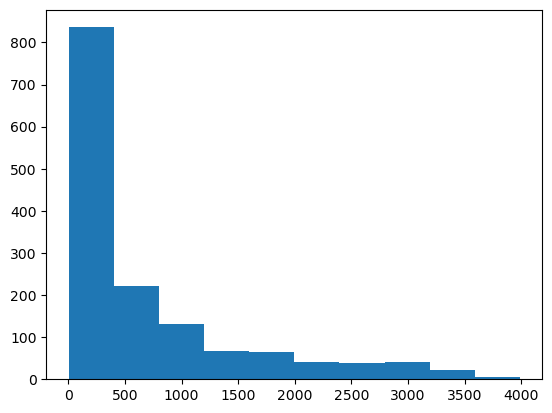

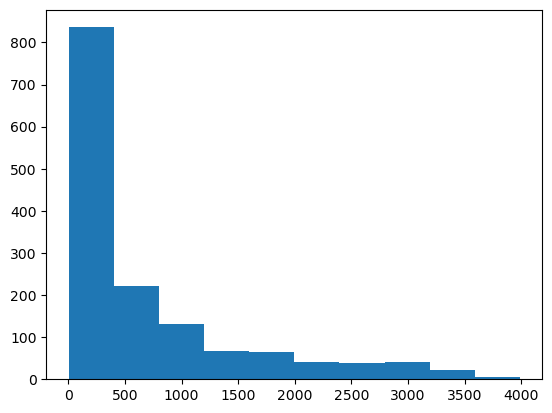

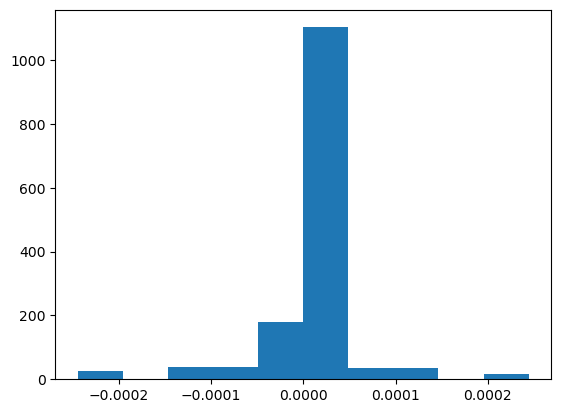

In [35]:
from matplotlib import pyplot as plt 

plt.hist(df_reprop["PX_TRUTH"])
plt.show()
plt.hist(df_truth["FIT_PX_1"])
plt.show()
plt.hist(np.sort(df_reprop["PX_TRUTH"]) - np.sort(df_truth["FIT_PX_1"]))
plt.show()

In [74]:
df_reprop = 
df_reprop["Y_TRUTH_2"]

df_truth = df_truth.sort_values(by=["FIT_PX_1"], ignore_index=True)
df_truth["GLOBAL_Y_HIT_2"]

0      -1286.500244
1       -375.812042
2      -1462.809204
3      -1071.818115
4      -1460.593628
           ...     
1463   -1014.700317
1464    1176.402832
1465    1425.385254
1466    1317.952881
1467    1180.227295
Name: Y_TRUTH_2, Length: 1468, dtype: float64

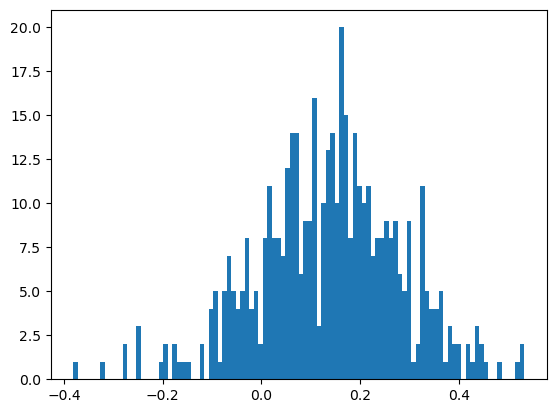

0.14349365234375
0.14504369220735808


In [81]:
x = df_reprop["Y_TRUTH_2"]-df_truth["GLOBAL_Y_HIT_2"]
x = x[np.abs(x-np.median(x)) < 0.8]
plt.hist(x, bins = 100)
plt.show()
print(np.median(x))
print(np.std(x))

## New Analysis

In [8]:
np.random.uniform(-0.1, 0.1, 6)

array([-0.06097708,  0.07680241,  0.04690237, -0.06161826, -0.00682692,
       -0.03788264])

In [9]:
import evaluation as eval
import numpy as np 
import pandas as pd

n_samples = 18
i = 3
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/280124_18_500k@200k/"

offsets_y = np.loadtxt(input_dir + "offsets_y.csv", delimiter = ",")
offsets_z = np.loadtxt(input_dir + "offsets_z.csv", delimiter = ",")
offsets_x = np.loadtxt(input_dir + "offsets_x.csv", delimiter = ",")

rotations_x = np.loadtxt(input_dir + "rotations_x.csv", delimiter = ",")
rotations_y = np.loadtxt(input_dir + "rotations_y.csv", delimiter = ",")
rotations_z = np.loadtxt(input_dir + "rotations_z.csv", delimiter = ",")

#total_parameters, total_sum_of_residuals_squared, df, df_offsets = eval.Analyse_Run(input_dir, i, offsets_x, offsets_y, offsets_z, rotations_x, rotations_y, rotations_z, np.random.uniform(-0.001, 0.001, 6), bounds = [(0, 0),(0, 0),(-np.pi/8, np.pi/8),(0, 0),(0, 0),(0, 0)])

In [10]:
import simulation as sim
from matplotlib import pyplot as plt

df = sim.Generate_DataFrame_From_ROOT(input_dir, 0)

0.09676913730708622

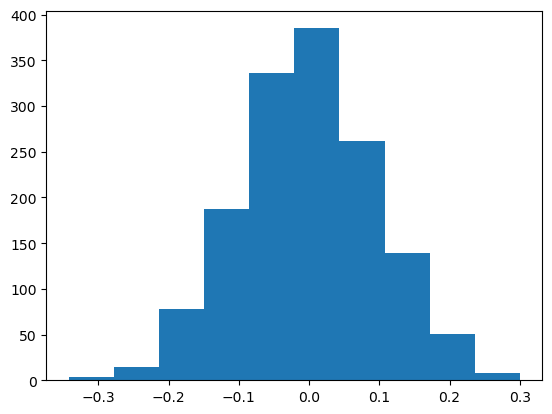

In [12]:
plt.hist(df["Y_TRUTH_2"] - df["LOCAL_Y_HIT_2"])
np.std(df["Y_TRUTH_2"] - df["LOCAL_Y_HIT_2"])

In [3]:
parameters = np.array([rotations_x[i], rotations_y[i], rotations_z[i], offsets_x[i], offsets_y[i], offsets_z[i]]).transpose()
parameters

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.19634954, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])